In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import scipy

In [2]:
def load_pickles(path):
    pickle_file = pd.read_pickle(path)
    return pickle_file

In [3]:
#loading the pickle files

reviews_path = "C:/Users/tjnai/Downloads/reviews.pickle"
business_path = "C:/Users/tjnai/Downloads/business.pickle"
bcategories_path = "C:/Users/tjnai/Downloads/business_categories.pickle"

reviews = load_pickles(reviews_path)
businesses = load_pickles(business_path)
business_categories = load_pickles(bcategories_path)

In [4]:
#Converting into dataframes

bcategories_df = pd.DataFrame(data=business_categories)
reviews_df = pd.DataFrame(data=reviews)

In [5]:
#Selecting only restaurants from all businesses
restaurants_df = bcategories_df[bcategories_df['category_name'] == 'Restaurants']

#Finding reviews of restaurants
restaurant_reviews = pd.merge(restaurants_df,reviews_df, on='business_id')

#Select columns
restaurant_reviews_df = restaurant_reviews[['business_id','date','review_id','stars','user_id']]

In [30]:
#restaurant_reviews_df

In [6]:
#Restaurant with highest number of reviews

temp_df = pd.DataFrame(data = restaurant_reviews_df.groupby('business_id').size()).reset_index()
temp_df.columns = ['business_id', 'number_of_reviews']
temp_df.loc[temp_df['number_of_reviews'].idxmax()]

business_id          4JNXUYY8wbaaDmk3BPzlWw
number_of_reviews                      7362
Name: 4529, dtype: object

business_id          4JNXUYY8wbaaDmk3BPzlWw
number_of_reviews                      7362
Name: 4529, dtype: object

In [7]:
#Creating training and testing data
restaurant_of_interest = restaurant_reviews_df[restaurant_reviews_df['business_id']== '4JNXUYY8wbaaDmk3BPzlWw']

#playing with dates
dates = restaurant_of_interest['date']

In [34]:
def groupby_date(restaurant_of_interest):
    year = []
    month = []
    for index, row in restaurant_of_interest.iterrows():
        split_date = row['date'].split('-')
        if int(split_date[0])>2012:
            year.append(split_date[0])
            month.append(split_date[1])

    year = pd.Series(year)
    month = pd.Series(month)
    hotel = pd.DataFrame()
    hotel['year'] = year.values
    hotel['month'] = month.values

    ans = hotel.groupby(['year', 'month']).size().reset_index()
    ans.columns = ['year', 'month','total_reviews']
    
    return ans

def create_train_test(restaurant_df):
    train_df = restaurant_df[restaurant_df['year']<'2017']
    test_df = restaurant_df[restaurant_df['year']=='2017']
    return train_df,test_df

def concatenate(df):
    year_month = []
    total_reviews=[]
    for index, row in df.iterrows():
        year_month.append(row['year']+'_'+row['month'])
        total_reviews.append(row['total_reviews'])
    year_month = pd.Series(year_month)
    total_reviews=pd.Series(total_reviews)
    df_new = pd.DataFrame()
    df_new['year-month']= year_month.values
    df_new['reviews']=total_reviews.values
    
    return df_new

In [58]:
def seasonal(train_df,test_df,pred_start,pred_end):
    
    season = 12
    df = pd.DataFrame()
    previous_reviews = train_df['total_reviews']
    predicted_reviews = []
    actual_reviews = []
    for index,row in test_df.iterrows():
        actual_reviews.append(row['total_reviews'])
        
    for index in range(pred_start,pred_end+1):
        predicted_reviews.append(previous_reviews[index-season])
        
    df['predicted_reviews'] = predicted_reviews
    df['actual_reviews'] = actual_reviews
     
    
    return df

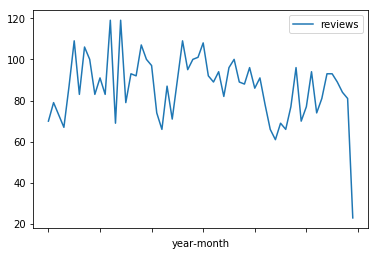

In [15]:
hotel_new.plot(x='year-month', y='reviews')

In [82]:
ans = groupby_date(restaurant_of_interest)
train_df,test_df = create_train_test(ans)
train_df_concat = concatenate(train_df)

df = seasonal(train_df,test_df,48,59).reset_index()
df.columns = ['months','predicted_reviews','actual_Reviews']
df_temp = df.iloc[0:6]
df_temp

,months,predicted_reviews,actual_Reviews
0,0,100,96
1,1,89,70
2,2,88,77
3,3,96,94
4,4,86,74
5,5,91,81


C:\Users\tjnai\Anaconda2\envs\py36\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


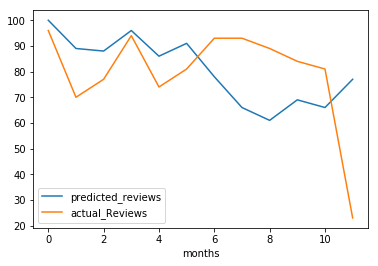

In [76]:
df.plot(x='months',y=['predicted_reviews','actual_Reviews'])

C:\Users\tjnai\Anaconda2\envs\py36\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


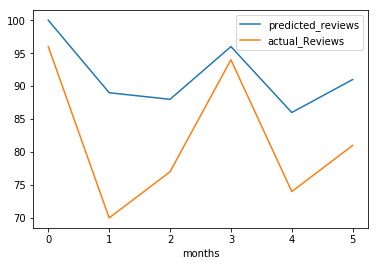

In [83]:
df_temp.plot(x='months',y=['predicted_reviews','actual_Reviews'])